In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [86]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [88]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [89]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [90]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [93]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

   

('2017-08-23',)

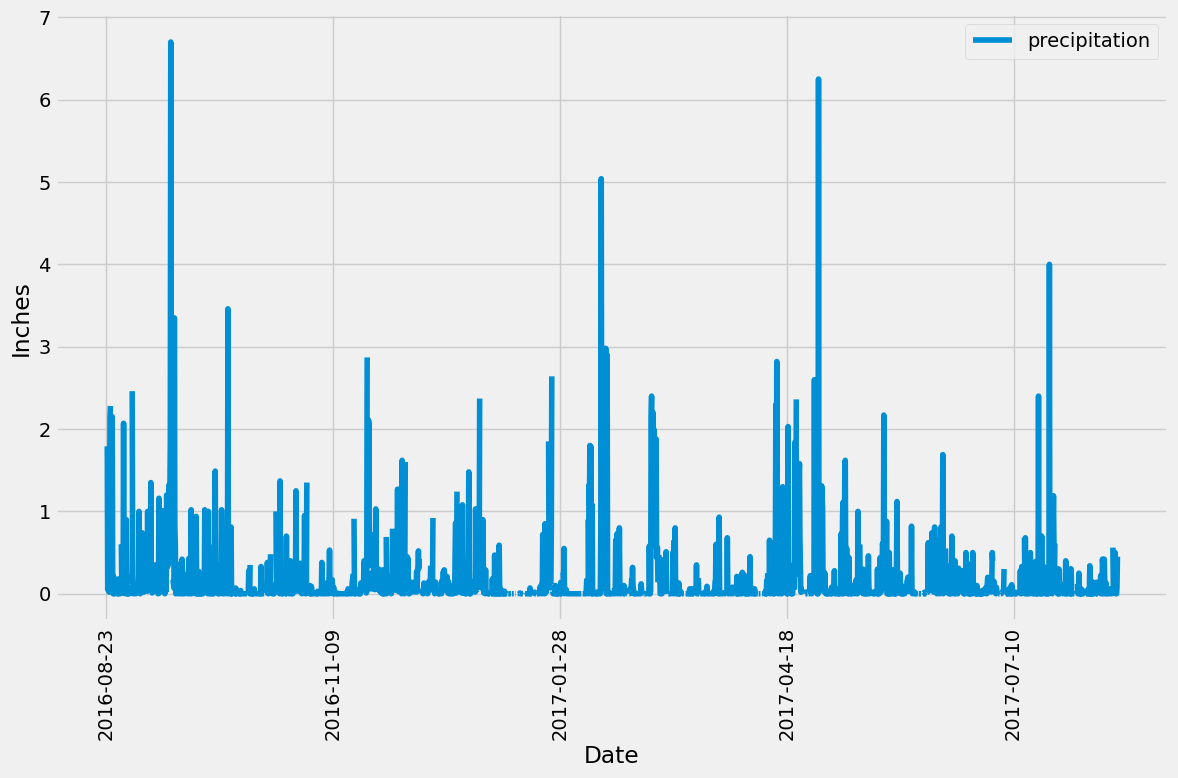

In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

precip_data = session.query(measurement.date, measurement.prcp)\
                            .filter(measurement.date >= year).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip_data, columns = ['Date', 'precipitation']).set_index('Date')

# Sort the dataframe by date
precip_df = precip_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize = (12,8), rot = 90)
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [95]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()


9

In [97]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs),\
            func.max(measurement.tobs), func.avg(measurement.tobs)).\
            filter(measurement.station== 'USC00519281').all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

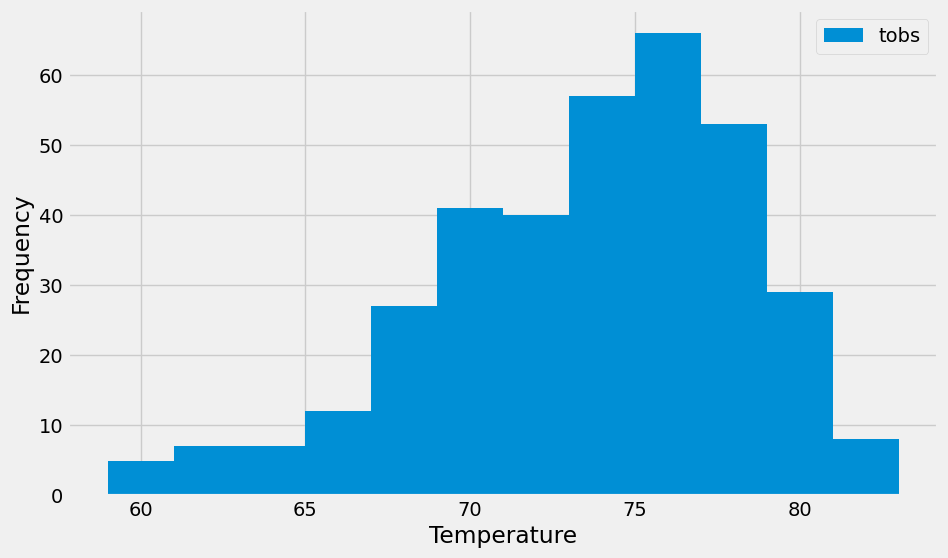

In [99]:
# Using the most active station id
active = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
                            filter(measurement.date >= year).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_df = pd.DataFrame(active_station)
station_df.plot(kind = 'hist', figsize = (10,6), bins = 12)
plt.xlabel('Temperature')

# Close Session

In [100]:
# Close Session
session.close()